✍ Мы рассмотрели наиболее распространённые статистические методы, которые используются уже много лет. Эти инструменты являются теоретической базой, и о них часто спрашивают на собеседованиях. Однако анализ временных рядов не ограничен этими инструментами. В этом юните мы кратко рассмотрим альтернативные методы анализа временных рядов, которые могут показать соизмеримые с классическими методами результаты.



Список открывает популярная модель с говорящим названием «Пророк» от Facebook*.

# PROPHET

## **Prophet** — это метод прогнозирования данных временных рядов на основе AR-модели, в которой учтены годовая, еженедельная и ежедневная сезонности, а также эффекты праздничных дней.

Prophet лучше всего работает с временными рядами, которые имеют сильные сезонные эффекты, а данные накоплены за несколько сезонов. Алгоритм устойчив к отсутствующим данным и сдвигам в тренде и обычно хорошо справляется с выбросами.

Prophet — библиотека с открытым исходным кодом, выпущенная командой Facebook Core Data Science. Для загрузки метод также доступен в PyPI (через pip install).

Prophet следует API модели sklearn. Это значит, что мы можем пользоваться им и его методами так же, как и в случае с моделями из sklearn: для инициализации модели создаётся экземпляр класса Prophet (myModel = Prophet()), а затем вызываются его методы обучения (.fit()) и прогнозирования (.predict()). Входные данные для методов Prophet должны представлять собой датафрейм с двумя столбцами — DS и Y.

+ Столбец DS (отметка даты) должен иметь временной формат (DateTime), например ГГГГ-ММ-ДД — для даты или ГГГГ-ММ-ДД ЧЧ:ММ:СС — для отметки времени.
+ Столбец Y должен быть числовым и представлять измерение, которое мы хотим спрогнозировать.

В качестве примера давайте рассмотрим временной ряд ежедневных просмотров страницы футболиста Пейтона Мэннинга на Wikipedia.

Импортируем Prophet и другие необходимые библиотеки, а также считаем датасет.

In [1]:
import pandas as pd

from prophet import Prophet

url = 'https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv'

df = pd.read_csv(url)

df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


Обучим модель на датасете:

In [2]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp94uvcnh8/66frz_8j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp94uvcnh8/ws66d9ef.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75600', 'data', 'file=/tmp/tmp94uvcnh8/66frz_8j.json', 'init=/tmp/tmp94uvcnh8/ws66d9ef.json', 'output', 'file=/tmp/tmp94uvcnh8/prophet_model1sdp7pjd/prophet_model-20230427151026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:10:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:10:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Для получения прогноза необходимо использовать DataFrame со столбцом DS, содержащим даты, для которых должен быть сделан прогноз. Вы можете получить такой DataFrame, используя вспомогательный метод Prophet.make_future_dataframe(), в который необходимо передать число дней для совершения прогноза. По умолчанию он также будет включать более ранние даты, поэтому мы также увидим, как обучалась модель.

In [3]:
future_df = model.make_future_dataframe(periods=365)

future_df.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


В результате построения прогноза каждому DS будет присвоено прогнозируемое значение (YHAT). Также в прогнозном датафрейме будут два новых столбца ('yhat_lower', 'yhat_upper'), в которых будут находиться верхняя и нижняя границы доверительного интервала:

In [4]:
forecast_df = model.predict(future_df)
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.203190,7.524349,8.951269
3266,2017-01-16,8.528195,7.816441,9.210305
3267,2017-01-17,8.315591,7.543211,9.053753
3268,2017-01-18,8.148199,7.375949,8.877749
3269,2017-01-19,8.160106,7.421829,8.892428


Мы можем отобразить прогноз, вызвав метод Prophet.plot и передав ему полученный датафрейм с результатами прогноза:

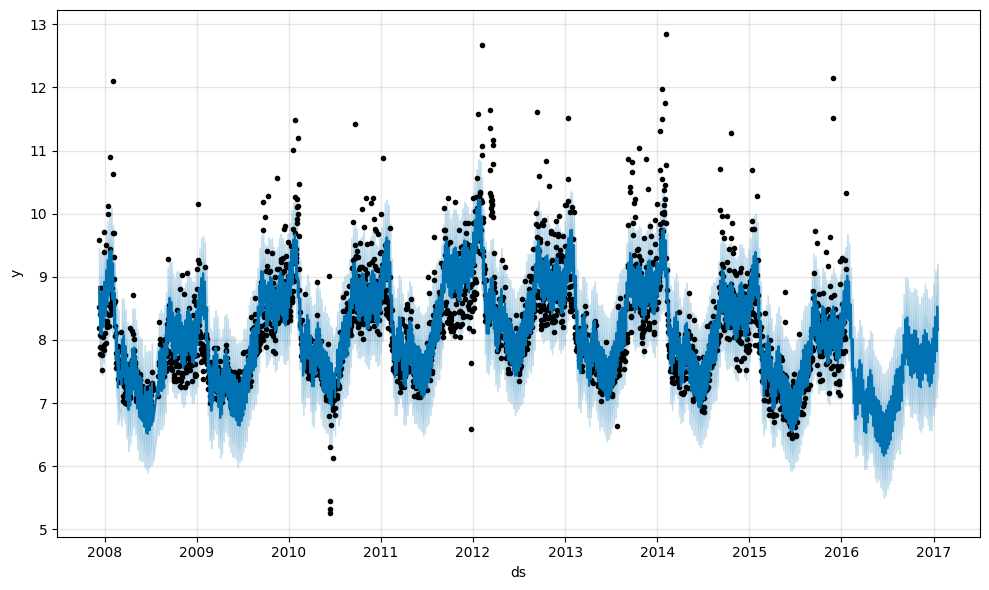

In [5]:
fig = model.plot(forecast_df)

Чтобы увидеть компоненты ряда, можно использовать метод Prophet.plot_components. По умолчанию предоставляются тренд и годовая и недельная сезонность временного ряда.

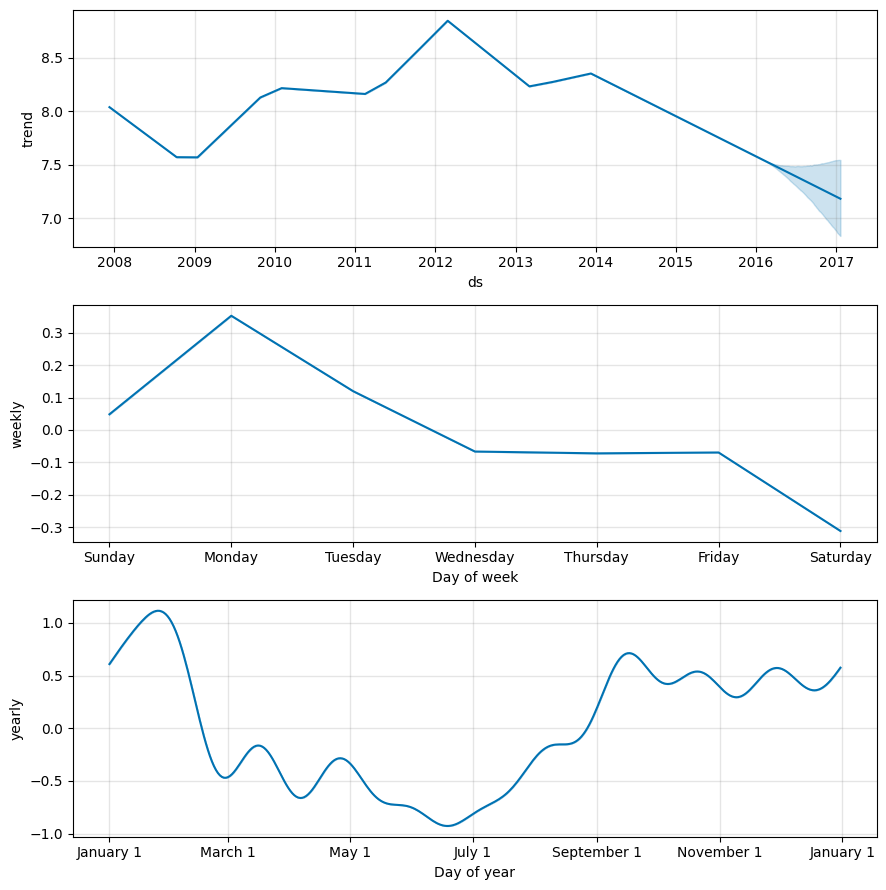

In [6]:
fig = model.plot_components(forecast_df)

# NEURALPROPHET

NeuralProphet — основанная на PyTorch усовершенствованная и более сложная модель, которая комбинирует в себе преимущества традиционных моделей для анализа временных рядов и методов глубокого обучения. NeuralProphet можно установить с помощью pip (pip install neuralprophet).

Вы ещё не знакомы с нейронными сетями, поэтому мы не будем углубляться в подробности реализации данного алгоритма. Тем не менее вы можете смело использовать эту библиотеку, так как запустить её в несколько шагов «из коробки» не представляет большого труда.

Познакомиться и поэкспериментировать с NeuralProphet вы можете, разбирая примеры из официального репозитория проекта на GitHub. Например, обратите внимание на решение задачи прогнозирования энергетической нагрузки на больницу в Сан-Франциско.

В этой русскоязычной статье представлен более подробный разбор алгоритма на примере решения задачи предсказания ежедневных просмотров страниц на Wikipedia, но уже с помощью NeuralProphet.

# МОДЕЛИ КЛАССИЧЕСКОГО ML

В практическом юните, при решении финансовой задачи, мы уже использовали линейную регрессию для получения прогноза. Таким же образом можно использовать другие модели машинного обучения:

+ другие линейные модели регрессии (логистическая, ридж- и лассо-регрессия);
+ ансамбли деревьев (случайный лес, градиентный бустинг над деревьями);
+ SVM (метод опорных векторов);
+ KNN (метод ближайших соседей);
+ и др.

Чтобы улучшить результаты такого подхода, стоит уделить особое внимание feature engineering (добавлению признаков).

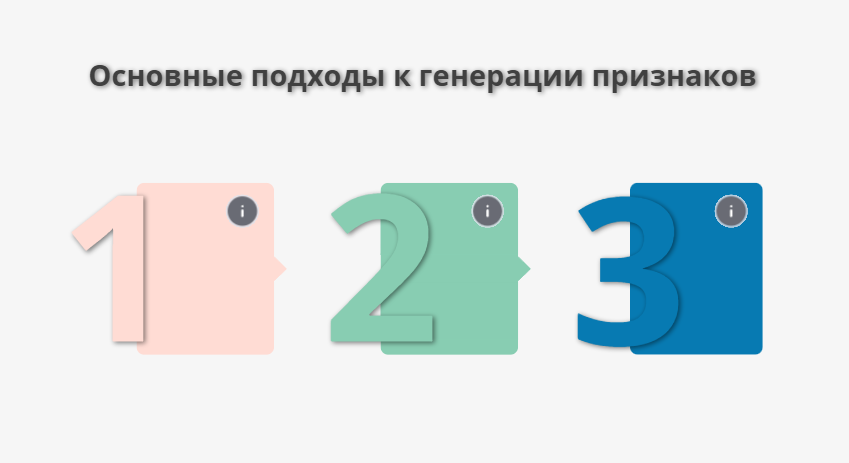

1. В предыдущем модуле мы уже упоминали, что на временной ряд могут влиять внешние факторы. Так, например, в задаче предсказания числа посетителей кинотеатра могут быть важные второстепенные факторы, такие как наличие или отсутствия дождя и температура воздуха, а в задаче прогнозирования объёма заказов косметики — наличие или отсутствие рекламы этого товара в недавнее время. Всё это можно добавлять в качестве дополнительных признаков.

2. Также хорошей практикой является добавление в качестве признаков лагов. Мы уже знаем, что это сдвиг временного ряда во времени. Тут стоит избегать так называемых «ликов» (от англ. leak — утечка) — попаданий ответов в тестовую выборку. Так, если вам нужно сделать прогноз на семь дней вперёд, то в качестве признаков вы не можете использовать лаги с 1 по 7 (Для последнего дня из тестовой выборки будут неизвестны значения предыдущих шести дней, так как для них нам тоже нужно сделать предсказания), а вот взятие лагов больше размера тестовой выборки — хорошая практика. То есть если размер вашей тестовой выборки — семь дней, то лаги стоит брать, начиная с 8 и более.

3. Используя специальные методы, некоторое количество признаков для временных рядов можно получить от даты:

+ час/минута/секунда,
+ число,
+ месяц,
+ год,
+ день недели,
+ день в году,
+ квартал,
+ выходной или рабочий день,
+ праздничный или рабочий день,
+ другие признаки.

### Часто добавление этих признаков даёт хороший прирост качества модели.

Несомненно, значимость таких признаков зависит от задачи, но совершенно точно временные ряды, напрямую связанные с человеческой деятельностью, зависимы от времени. Для добавления признаков от даты удобнее всего пользоваться встроенными методами Series.dt. Для этого сначала необходимо привести столбец к типу Datetime, а затем вызвать интересующий вас метод. Например, для получения дня недели от даты можно выполнить следующий код:



```
df['SomeDate'] = pd.to_datetime(df['SomeDate'])

df['DayOfWeek'] = df['SomeDate'].dt.dayofweek
```
Сначала применяем к столбцу преобразование к Datetime, после чего вызываем .dt.dayofweek. Ознакомиться с полным перечнем доступных методов можно в официальной документации.